
# 🔍 Unsupervised Learning – Complete Guide (Step by Step)

---

## ✅ 1. What is Unsupervised Learning?

* **Unsupervised learning** is a type of machine learning where:

  * We **do NOT have labeled data**.
  * The model tries to **find patterns or structures** in the data **on its own**.

Think of it as **"learning without a teacher."**

---

## 📊 2. What Does It Do?

Unsupervised learning:

* **Groups similar data points together** (Clustering)
* **Reduces the number of features** while preserving key information (Dimensionality Reduction)
* **Finds hidden structure** in data

---

## 📌 3. Key Difference from Supervised Learning

| Feature      | Supervised Learning     | Unsupervised Learning          |
| ------------ | ----------------------- | ------------------------------ |
| Labels       | ✅ Yes                   | ❌ No                           |
| Goal         | Predict labels (output) | Discover structure in data     |
| Example task | Classify cats vs dogs   | Group similar animals together |

---

## 🧠 4. Main Types of Unsupervised Learning

### A. **Clustering** (Group similar data points)

* Goal: Group data points into **clusters** so that points in the same cluster are **similar**.
* Examples:

  * Segmenting customers into groups
  * Grouping similar news articles

#### Common Algorithms:

| Algorithm                   | Description                                                            |
| --------------------------- | ---------------------------------------------------------------------- |
| **K-Means**                 | Groups data into **K clusters** by minimizing distance within clusters |
| **Hierarchical Clustering** | Builds a tree of clusters (good for visualizing)                       |
| **DBSCAN**                  | Finds clusters based on **density** (can find arbitrary shapes)        |

---

### B. **Dimensionality Reduction** (Simplify data)

* Goal: Reduce the number of input features while **keeping important patterns**.
* Useful for:

  * Visualizing high-dimensional data
  * Speeding up machine learning algorithms
  * Removing noise

#### Common Algorithms:

| Algorithm                              | Description                                                          |
| -------------------------------------- | -------------------------------------------------------------------- |
| **PCA** (Principal Component Analysis) | Projects data onto fewer dimensions (directions of maximum variance) |
| **t-SNE**                              | Visualizes complex data in 2D/3D (great for clustering)              |
| **Autoencoders**                       | Neural networks that learn compressed representations of data        |

---

## 🔍 5. Real-Life Examples

| Application               | Type                     | Purpose                    |
| ------------------------- | ------------------------ | -------------------------- |
| Customer segmentation     | Clustering               | Target marketing           |
| Movie recommendations     | Clustering               | Suggest similar movies     |
| Anomaly detection (fraud) | Clustering               | Find outliers              |
| Image compression         | Dimensionality Reduction | Reduce file size           |
| Face recognition          | Dimensionality Reduction | Extract important features |

---

## 🔬 6. K-Means Clustering – Intuition

1. Choose number of clusters $K$
2. Randomly select $K$ centroids (points)
3. Assign each data point to the **nearest centroid**
4. Recalculate centroids based on the current clusters
5. Repeat steps 3-4 until centroids don’t change much

✅ Final output: Each point assigned to a **cluster** (no labels needed)

---

## 🧪 7. Example in Python (K-Means)

```python
from sklearn.cluster import KMeans
import numpy as np

# Sample data (no labels)
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

# Fit K-Means with 2 clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Get cluster assignments
print(kmeans.labels_)
```

Output might be:

```
[1 1 1 0 0 0]  # Grouped into two clusters
```

---

## ✅ 8. Pros & Cons of Unsupervised Learning

| Pros                                | Cons                              |
| ----------------------------------- | --------------------------------- |
| Finds hidden patterns automatically | No clear way to evaluate accuracy |
| Useful for exploring unknown data   | Might find meaningless groupings  |
| Reduces human labeling effort       | Interpretation can be subjective  |

---

## 🧭 9. When to Use Unsupervised Learning?

* When you **don’t have labeled data**
* To **explore and understand** your data
* For **data preprocessing** before applying supervised learning
* For **anomaly detection** or **data compression**

---

## 📌 10. Summary Table

| Task                     | Algorithms                    | Output                           |
| ------------------------ | ----------------------------- | -------------------------------- |
| Clustering               | K-Means, DBSCAN, Hierarchical | Cluster labels (not true labels) |
| Dimensionality Reduction | PCA, t-SNE, Autoencoders      | Compressed features              |
| Outlier Detection        | Isolation Forest, DBSCAN      | Anomalous points                 |


Sure! Here's a **short and clean revision note** for **K-Means Clustering** – perfect for quick study.

---

# 📌 K-Means Clustering – Short Notes

---

## 🔷 What is K-Means?

* **Unsupervised learning algorithm** used for **clustering**.
* Groups data into **K clusters** based on **feature similarity**.
* Goal: Minimize the **distance within clusters**, and maximize the distance **between clusters**.

---

## 🔹 How It Works (Steps)

1. **Choose K** (number of clusters)
2. **Randomly initialize K centroids**
3. **Assign** each point to the **nearest centroid**
4. **Recalculate centroids** (mean of points in each cluster)
5. Repeat steps 3–4 until centroids **don't change much**

---

## 🔸 Key Concepts

* **Centroid**: Center of a cluster
* **Inertia**: Total distance between points and their centroid (want to minimize)
* **Convergence**: When assignments no longer change

---

## 📊 Example Use Cases

* Customer segmentation
* Market basket analysis
* Image compression
* Document/topic clustering

---

## ✅ Advantages

* Simple and fast
* Works well for large datasets
* Easy to understand and implement

---

## ❌ Disadvantages

* Need to **specify K** in advance
* Sensitive to **initial centroid placement**
* Can converge to **local minima**
* Struggles with **non-spherical clusters**

---



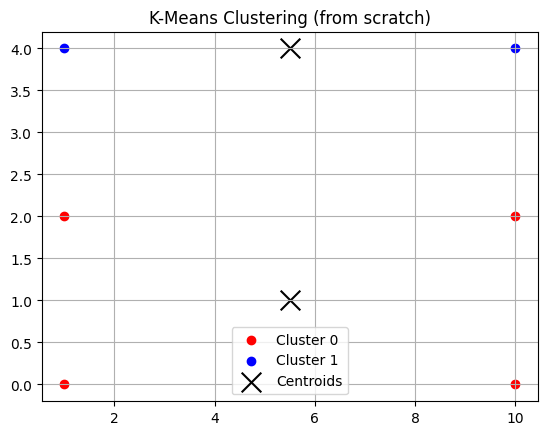

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# Step 1: Create Sample Data
# ------------------------------
data = np.array([
    [1, 2], [1, 4], [1, 0],
    [10, 2], [10, 4], [10, 0]
])

# ------------------------------
# Step 2: K-Means Implementation
# ------------------------------
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def initialize_centroids(data, k):
    np.random.seed(42)
    indices = np.random.choice(len(data), k, replace=False)
    return data[indices]

def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster_index = np.argmin(distances)
        clusters.append(cluster_index)
    return np.array(clusters)

def update_centroids(data, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            new_centroid = cluster_points.mean(axis=0)
        else:
            new_centroid = data[np.random.choice(len(data))]  # reinitialize if empty
        new_centroids.append(new_centroid)
    return np.array(new_centroids)

def has_converged(old_centroids, new_centroids):
    return np.allclose(old_centroids, new_centroids)

def kmeans(data, k, max_iters=100):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters, k)
        if has_converged(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters

# ------------------------------
# Step 3: Run the Algorithm
# ------------------------------
k = 2
final_centroids, final_clusters = kmeans(data, k)

# ------------------------------
# Step 4: Plot the Result
# ------------------------------
colors = ['red', 'blue', 'green']
for i in range(k):
    points = data[final_clusters == i]
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], label=f'Cluster {i}')
    
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='black', marker='x', s=200, label='Centroids')
plt.title('K-Means Clustering (from scratch)')
plt.legend()
plt.grid(True)
plt.show()



---

# 📌 **Hierarchical Clustering – Short Notes**

---

## 🔍 **What is Hierarchical Clustering?**

* **Unsupervised learning** algorithm that builds a **hierarchy** of clusters.
* Creates a **tree-like structure** called a **dendrogram**.
* There are two types:

  * **Agglomerative** (Bottom-Up): Start with each point as its own cluster, merge gradually.
  * **Divisive** (Top-Down): Start with one large cluster, split recursively.

> **Most commonly used** is **Agglomerative**.

---

## 🧠 **Steps of Agglomerative Hierarchical Clustering**:

1. **Start** with each data point as its own cluster.
2. **Find the two closest clusters** based on a chosen distance metric.
3. **Merge** the two closest clusters.
4. Repeat the process (steps 2 and 3) until:

   * A single cluster remains, or
   * A desired number of clusters is achieved.

---

## 📏 **Linkage Methods** (Defines how to measure "closeness")

1. **Single Linkage**: Minimum distance between two clusters.
2. **Complete Linkage**: Maximum distance between two clusters.
3. **Average Linkage**: Average distance between all pairs.
4. **Ward’s Method**: Minimizes variance within clusters.

---

## 📈 **Dendrogram**:

* A **tree diagram** that visually represents the hierarchy of clusters.
* You can **cut the tree** at any level to form the desired number of clusters.

---

## ✅ **Advantages**:

* No need to pre-define the number of clusters.
* Provides a **visual hierarchy** of data.
* Useful for **small to medium datasets**.

## ❌ **Disadvantages**:

* **Computationally expensive** for large datasets (O(n²)).
* Sensitive to **outliers** and **noisy data**.
* Can struggle with **non-spherical clusters**.

---

## 🔧 **When to Use**:

* When you want to **discover hierarchical relationships**.
* When you don't know the number of clusters beforehand.
* Useful for **data that naturally forms a tree-like structure**.

---

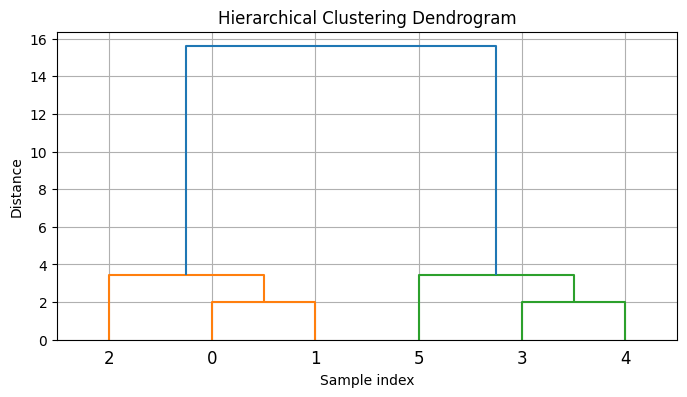

Cluster labels: [1 1 1 2 2 2]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# ------------------------
# Sample Data (2D points)
# ------------------------
data = np.array([
    [1, 2], [1, 4], [1, 0],   # Cluster 1 (close points)
    [10, 2], [10, 4], [10, 0]  # Cluster 2 (close points)
])

# ------------------------
# Step 1: Compute the Linkage Matrix
# ------------------------
# 'ward' minimizes variance within clusters
linked = linkage(data, method='ward')

# ------------------------
# Step 2: Plot the Dendrogram
# ------------------------
plt.figure(figsize=(8, 4))
dendrogram(linked, orientation='top', distance_sort='ascending')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

# ------------------------
# Step 3: Get Cluster Labels (Optional)
# ------------------------
# Cut the tree at a threshold to form clusters (e.g., 2 clusters)
labels = fcluster(linked, t=2, criterion='maxclust')
print("Cluster labels:", labels)




# 📌 **DBSCAN Clustering – Short Notes**

---

## 🔍 **What is DBSCAN?**

* **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** is a density-based clustering algorithm.
* It groups together **closely packed points** and marks points in low-density areas as **outliers** (noise).
* **No need to predefine the number of clusters**.
* Works well with **clusters of arbitrary shapes** and **handling noise**.

---

## 🧠 **How DBSCAN Works**:

### Key Concepts:

1. **Core Points**:

   * A point with **at least MinPts** points within a distance of **ε (epsilon)**.

2. **Border Points**:

   * Points within **ε distance** from a core point but not having enough neighbors to be core points themselves.

3. **Noise Points**:

   * Points that **don’t satisfy core or border point conditions** and are **isolated**.

### Algorithm Steps:

1. **Pick an unvisited point**.
2. If it’s a **core point**, create a **new cluster**.
3. Expand the cluster by adding all points **within ε** distance of the core point.
4. Mark **border points** and **noise points** accordingly.
5. **Repeat** until all points are visited.

---

## 🧭 **Key Parameters**:

1. **ε (epsilon)**: The **maximum distance** between points to be considered neighbors.
2. **MinPts (Minimum Points)**: Minimum number of points required to form a cluster.

---

## ✅ **Advantages**:

* **No need to specify the number of clusters** in advance.
* Can identify **clusters of arbitrary shapes**.
* **Good for handling noise** by labeling it as outliers.

## ❌ **Disadvantages**:

* Sensitive to **parameter settings** (`ε` and `MinPts`).
* Struggles with **clusters of varying densities**.
* **Computationally expensive** for large datasets.

---

## 🧪 **When to Use DBSCAN**:

* **Spatial data** (geographical data, image segmentation).
* When you have **clusters with irregular shapes**.
* When the data has **noise or outliers** that you want to ignore.

---



# 📌 **Silhouette Score – Short Notes**

---

## 🔍 **What is Silhouette Score?**

* A metric used to evaluate the **quality of clusters** in a clustering algorithm.
* Measures how similar an object is to its own cluster compared to other clusters.
* The score helps in determining if the data points are **well-clustered** or not.

---

## 🧠 **Formula**:

For a point `i`:

$$
S(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

* **a(i)**: Average distance between point `i` and all other points in the same cluster.
* **b(i)**: Average distance between point `i` and the nearest cluster that is not the same as its own.

---

## 📊 **Score Range**:

* **+1**: Point is well-clustered (far from other clusters).
* **0**: Point is **on the boundary** between two clusters.
* **-1**: Point is **misclassified** (closer to points in another cluster).

---

## ✅ **Advantages**:

* **Easy to interpret**: Values between -1 and +1.
* Can evaluate clustering **without ground truth**.
* Helps in **selecting the optimal number of clusters**.

## ❌ **Disadvantages**:

* **Sensitive to the shape of clusters**.
* **Computationally expensive** for large datasets.

---

## 🧪 **When to Use**:

* When you need to **evaluate clustering** quality.
* To **compare different clustering results** and select the best number of clusters.

---
